<a href="https://colab.research.google.com/github/raikanwalrai/Tableau/blob/main/01_Robotics_Case_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import os

# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
from google.colab import drive

# Mount Google Drive
#drive.mount('/00_00_COLA')
drive.mount('/00_00_COLA')

Mounted at /00_00_COLA


In [4]:
np.random.seed(123)

# ----------------------------
# Parameters
# ----------------------------
robots = [f"Cobot_{i}" for i in range(1, 11)]
operators = [f"Op_{i}" for i in range(1, 21)]
dates = pd.date_range("2025-02-01", periods=300, freq="H")

In [11]:
print(robots[0:2],operators[0:2],dates [0:2])

['Cobot_1', 'Cobot_2'] ['Op_1', 'Op_2'] DatetimeIndex(['2025-02-01 00:00:00', '2025-02-01 01:00:00'], dtype='datetime64[ns]', freq='h')


In [52]:
# ----------------------------
# Sheet 1: Robot Operations
# ----------------------------
robot_operations = pd.DataFrame({
    "Robot_ID": np.random.choice(robots, 300),
    "Shift": np.random.choice(["Day", "Night"], 300),
    "Robot_Speed_Percent": np.random.choice([10, 30, 40, 60, 80, 90], 300),
    "Tasks_Completed": np.random.randint(1, 120, 300)
})

In [53]:
robot_operations.head()

,Robot_ID,Shift,Robot_Speed_Percent,Tasks_Completed
0,Cobot_9,Night,90,79
1,Cobot_10,Night,30,110
2,Cobot_6,Day,90,98
3,Cobot_10,Night,30,45
4,Cobot_10,Day,60,88


In [55]:
robot_operations["Avg_Task_Time_sec"] = ( 120 - robot_operations["Robot_Speed_Percent"] * 0.8  + np.random.normal(0, 5, 300) )


In [56]:
robot_operations.head()

,Robot_ID,Shift,Robot_Speed_Percent,Tasks_Completed,Avg_Task_Time_sec
0,Cobot_9,Night,90,79,43.743434
1,Cobot_10,Night,30,110,96.682921
2,Cobot_6,Day,90,98,45.878728
3,Cobot_10,Night,30,45,95.486395
4,Cobot_10,Day,60,88,75.403208


In [57]:
# ----------------------------
# Sheet 2: Safety Events (120)
# ----------------------------
Event_Types = ["Near_Miss", "Emergency_Stop", "Minor_Injury"]
safety_events = pd.DataFrame({ "Date": np.random.choice(dates, 120),  "Robot_ID": np.random.choice(robots, 120),  "Event_Type": np.random.choice( Event_Types, 120, p=[0.6, 0.3, 0.1] ) })



In [58]:
safety_events.tail()

,Date,Robot_ID,Event_Type
115,2025-02-13 08:00:00,Cobot_10,Near_Miss
116,2025-02-12 11:00:00,Cobot_3,Near_Miss
117,2025-02-12 07:00:00,Cobot_2,Near_Miss
118,2025-02-05 15:00:00,Cobot_8,Near_Miss
119,2025-02-01 23:00:00,Cobot_9,Near_Miss


In [59]:
severity_map = {     "Near_Miss": 1,     "Emergency_Stop": 3,     "Minor_Injury": 6 }
safety_events["Severity"] = safety_events["Event_Type"].map(severity_map)
safety_events["Downtime_Min"] = safety_events["Severity"] * np.random.randint(5, 15, 120)

In [60]:
print(severity_map)

{'Near_Miss': 1, 'Emergency_Stop': 3, 'Minor_Injury': 6}


In [61]:
safety_events.tail()

,Date,Robot_ID,Event_Type,Severity,Downtime_Min
115,2025-02-13 08:00:00,Cobot_10,Near_Miss,1,8
116,2025-02-12 11:00:00,Cobot_3,Near_Miss,1,7
117,2025-02-12 07:00:00,Cobot_2,Near_Miss,1,14
118,2025-02-05 15:00:00,Cobot_8,Near_Miss,1,10
119,2025-02-01 23:00:00,Cobot_9,Near_Miss,1,10


In [62]:
# ----------------------------
# Sheet 3: Human Feedback
# ----------------------------
human_feedback = pd.DataFrame({ "Robot_ID": np.random.choice(robots, 200), "Operator_ID": np.random.choice(operators, 200), "Comfort_Score": np.random.randint(1, 6, 200) })

human_feedback["Trust_Level"] = pd.cut( human_feedback["Comfort_Score"],  bins=[0, 2, 4, 5],     labels=["Low", "Medium", "High"] )

In [63]:
human_feedback.tail()

,Robot_ID,Operator_ID,Comfort_Score,Trust_Level
195,Cobot_6,Op_6,2,Low
196,Cobot_4,Op_9,3,Medium
197,Cobot_10,Op_7,3,Medium
198,Cobot_10,Op_18,5,High
199,Cobot_3,Op_6,3,Medium


In [36]:
# ----------------------------
# Sheet 4: Costs
# ----------------------------
costs = pd.DataFrame({     "Cost_Type": [ "Downtime_Cost_per_Min",  "Safety_Incident_Cost", "Productivity_Value_per_Task"   ],     "Cost_Value": [150, 5000, 40] })



In [37]:
costs.tail()

,Cost_Type,Cost_Value
0,Downtime_Cost_per_Min,150
1,Safety_Incident_Cost,5000
2,Productivity_Value_per_Task,40


In [64]:
# ----------------------------
# Write Excel File
# ----------------------------

file_path = "/00_00_COLA/MyDrive/00_00_COLA/Cobot_Safety_Productivity_Discussion_Case.xlsx"
with pd.ExcelWriter(file_path) as writer:
    robot_operations.to_excel(writer, sheet_name="Robot_Operations", index=False)
    safety_events.to_excel(writer, sheet_name="Safety_Events", index=False)
    human_feedback.to_excel(writer, sheet_name="Human_Feedback", index=False)
    costs.to_excel(writer, sheet_name="Costs", index=False)

print(f"Discussion case Excel file generated successfully at:\n{file_path}")


Discussion case Excel file generated successfully at:
/00_00_COLA/MyDrive/00_00_COLA/Cobot_Safety_Productivity_Discussion_Case.xlsx


In [65]:
xls = pd.ExcelFile(file_path)

print("Sheets found in the Excel file:")
print(xls.sheet_names)


Sheets found in the Excel file:
['Robot_Operations', 'Safety_Events', 'Human_Feedback', 'Costs']


In [66]:
sheets = pd.read_excel(file_path, sheet_name=None)
for sheet_name, df in sheets.items():
    print(f"\n===== Sheet: {sheet_name} =====")
    display(df.head())



===== Sheet: Robot_Operations =====


,Robot_ID,Shift,Robot_Speed_Percent,Tasks_Completed,Avg_Task_Time_sec
0,Cobot_9,Night,90,79,43.743434
1,Cobot_10,Night,30,110,96.682921
2,Cobot_6,Day,90,98,45.878728
3,Cobot_10,Night,30,45,95.486395
4,Cobot_10,Day,60,88,75.403208



===== Sheet: Safety_Events =====


,Date,Robot_ID,Event_Type,Severity,Downtime_Min
0,2025-02-11 17:00:00,Cobot_10,Emergency_Stop,3,18
1,2025-02-04 10:00:00,Cobot_9,Near_Miss,1,6
2,2025-02-01 22:00:00,Cobot_3,Near_Miss,1,10
3,2025-02-11 09:00:00,Cobot_1,Near_Miss,1,13
4,2025-02-05 11:00:00,Cobot_5,Near_Miss,1,6



===== Sheet: Human_Feedback =====


,Robot_ID,Operator_ID,Comfort_Score,Trust_Level
0,Cobot_3,Op_15,2,Low
1,Cobot_1,Op_10,4,Medium
2,Cobot_1,Op_3,4,Medium
3,Cobot_7,Op_13,2,Low
4,Cobot_8,Op_8,3,Medium



===== Sheet: Costs =====


,Cost_Type,Cost_Value
0,Downtime_Cost_per_Min,150
1,Safety_Incident_Cost,5000
2,Productivity_Value_per_Task,40


In [67]:
for sheet_name, df in sheets.items():
    print(f"\nSheet: {sheet_name}")
    print("Shape:", df.shape)
    print("Columns:", list(df.columns))



Sheet: Robot_Operations
Shape: (300, 5)
Columns: ['Robot_ID', 'Shift', 'Robot_Speed_Percent', 'Tasks_Completed', 'Avg_Task_Time_sec']

Sheet: Safety_Events
Shape: (120, 5)
Columns: ['Date', 'Robot_ID', 'Event_Type', 'Severity', 'Downtime_Min']

Sheet: Human_Feedback
Shape: (200, 4)
Columns: ['Robot_ID', 'Operator_ID', 'Comfort_Score', 'Trust_Level']

Sheet: Costs
Shape: (3, 2)
Columns: ['Cost_Type', 'Cost_Value']


In [68]:
robot_ops = pd.read_excel(file_path, sheet_name="Robot_Operations")
safety = pd.read_excel(file_path, sheet_name="Safety_Events")
feedback = pd.read_excel(file_path, sheet_name="Human_Feedback")
costs = pd.read_excel(file_path, sheet_name="Costs")


In [69]:
robot_ops.info()
safety.info()
feedback.info()
costs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Robot_ID             300 non-null    object 
 1   Shift                300 non-null    object 
 2   Robot_Speed_Percent  300 non-null    int64  
 3   Tasks_Completed      300 non-null    int64  
 4   Avg_Task_Time_sec    300 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          120 non-null    datetime64[ns]
 1   Robot_ID      120 non-null    object        
 2   Event_Type    120 non-null    object        
 3   Severity      120 non-null    int64         
 4   Downtime_Min  120 non-null    int64         
dtypes: datetime64[ns](1), in

**Q1️⃣ Relationship Between Robot Speed & Productivity**

In [70]:
file_path = "/00_00_COLA/MyDrive/00_00_COLA/Cobot_Safety_Productivity_Discussion_Case.xlsx"

In [71]:
ops = pd.read_excel(file_path ,     sheet_name="Robot_Operations" )

productivity_by_speed = ops.groupby("Robot_Speed_Percent")[ ["Tasks_Completed", "Avg_Task_Time_sec"] ].mean()

print("\nProductivity vs Speed:")
print(productivity_by_speed)



Productivity vs Speed:
                     Tasks_Completed  Avg_Task_Time_sec
Robot_Speed_Percent                                    
10                         65.812500         112.502070
30                         60.563636          97.540346
40                         49.543860          88.852997
60                         64.514286          70.533882
80                         53.750000          56.864731
90                         54.204082          47.034356


**Q2️⃣ Safety Risk vs Robot Speed**

In [72]:
safety = pd.read_excel(     file_path,     sheet_name="Safety_Events" )

# Approximate speed association by robot
speed_map = ops.groupby("Robot_ID")["Robot_Speed_Percent"].mean()
safety["Avg_Robot_Speed"] = safety["Robot_ID"].map(speed_map)

safety_by_speed = safety.groupby(  pd.cut(safety["Avg_Robot_Speed"], bins=[30,50,70,90]) )["Severity"].mean()

print("\nAverage Safety Severity by Speed Band:")
print(safety_by_speed)



Average Safety Severity by Speed Band:
Avg_Robot_Speed
(30, 50]    2.066667
(50, 70]    2.116667
(70, 90]         NaN
Name: Severity, dtype: float64


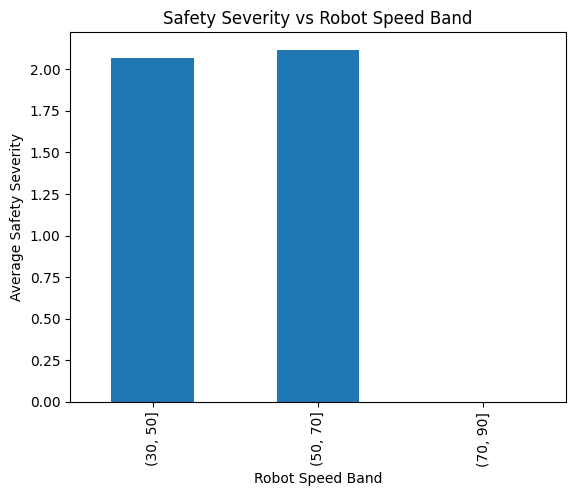

In [73]:
safety_by_speed.plot(kind="bar")
plt.xlabel("Robot Speed Band")
plt.ylabel("Average Safety Severity")
plt.title("Safety Severity vs Robot Speed Band")
plt.show()


**Q3️⃣ Human Comfort & Trust vs Speed**

In [90]:
feedback = pd.read_excel( file_path,    sheet_name="Human_Feedback" )
feedback = feedback.merge(     speed_map.rename("Avg_Robot_Speed"),     on="Robot_ID" )
comfort_by_speed = feedback.groupby(     pd.cut(feedback["Avg_Robot_Speed"], bins=[30,50,70,90]) )["Comfort_Score"].mean()
print("\nAverage Operator Comfort by Speed Band:")
print(comfort_by_speed)


Average Operator Comfort by Speed Band:
Avg_Robot_Speed
(30, 50]    3.010309
(50, 70]    2.883495
(70, 90]         NaN
Name: Comfort_Score, dtype: float64


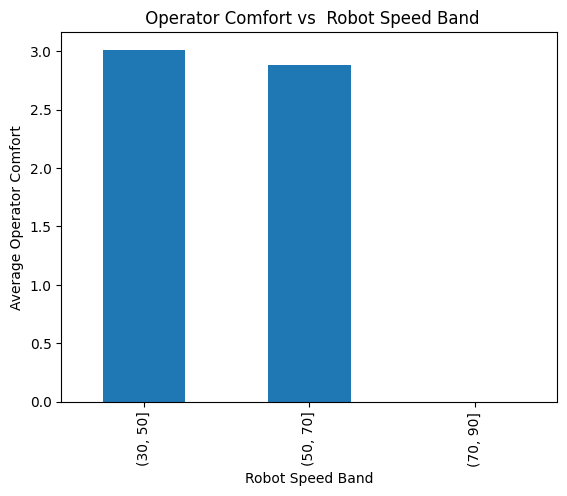

In [95]:
comfort_by_speed.plot(kind="bar")
plt.xlabel("Robot Speed Band")
plt.ylabel("Average Operator Comfort")
plt.title(" Operator Comfort vs  Robot Speed Band")
plt.show()

**Q4️⃣ Productivity vs Safety vs Human Trust (Trade-off)**

In [100]:
ops["Speed_Band"] = pd.cut(  ops["Robot_Speed_Percent"],   bins=[0, 50, 70, 100],     labels=["Low", "Medium", "High"] )
# Robot → Speed_Band mapping
robot_speed_band = (  ops.groupby("Robot_ID")["Speed_Band"].agg(lambda x: x.mode()[0]) )

safety["Speed_Band"] = safety["Robot_ID"].map(robot_speed_band)
feedback["Speed_Band"] = feedback["Robot_ID"].map(robot_speed_band)


summary = pd.DataFrame({
    "Avg_Tasks_Completed": ops.groupby("Speed_Band")["Tasks_Completed"].mean(),
    "Avg_Safety_Severity": safety.groupby("Speed_Band")["Severity"].mean(),
    "Avg_Comfort": feedback.groupby("Speed_Band")["Comfort_Score"].mean()
})


print("\nTrade-off Summary:")
print(summary)



Trade-off Summary:
            Avg_Tasks_Completed  Avg_Safety_Severity  Avg_Comfort
Speed_Band                                                       
Low                   58.212500             2.097561     2.858156
Medium                64.514286                  NaN          NaN
High                  53.961905             2.078947     3.152542


++++++++++++++++++++++++++++++++++++++++++++++++

**Study and Enhance This Part Below In Future or Next Properly**

++++++++++++++++++++++++++++++++++++++++++++++++

**How to integrate COlab with Google Drive and Git Hub ?**

In [103]:
print(os.getcwd())

/content


In [104]:
!git clone https://github.com/raikanwalrai/Tableau.git


Cloning into 'Tableau'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 19 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (19/19), 9.85 MiB | 15.22 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [105]:
!cd /content/Tableau && git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [106]:
!cd /content/Tableau && git add Cobot_Safety_Productivity_Discussion_Case.xlsx


In [107]:
os.listdir("/content/Tableau")


['Cobot_Safety_Productivity_Discussion_Case.xlsx',
 '.git',
 '01_Robotics_Case_01.ipynb',
 'superstore_sales.xlsx',
 '01_SalesAnalysis_02.ipynb',
 'sample_-_superstore.xls']

In [109]:
repo_path = "/content/Tableau"
file_path = os.path.join(     repo_path,    "Cobot_Safety_Productivity_Discussion_Case.xlsx" )

with pd.ExcelWriter(file_path) as writer:
    robot_operations.to_excel(writer, sheet_name="Robot_Operations", index=False)
    safety_events.to_excel(writer, sheet_name="Safety_Events", index=False)
    human_feedback.to_excel(writer, sheet_name="Human_Feedback", index=False)
    costs.to_excel(writer, sheet_name="Costs", index=False)

print(f"Excel file saved inside GitHub repo at:\n{file_path}")

Excel file saved inside GitHub repo at:
/content/Tableau/Cobot_Safety_Productivity_Discussion_Case.xlsx


In [110]:
!ls -lh /content/Tableau


total 13M
-rw-r--r-- 1 root root  918 Feb  6 04:32 01_Robotics_Case_01.ipynb
-rw-r--r-- 1 root root 1.2M Feb  6 04:32 01_SalesAnalysis_02.ipynb
-rw-r--r-- 1 root root  24K Feb  6 04:33 Cobot_Safety_Productivity_Discussion_Case.xlsx
-rw-r--r-- 1 root root 3.3M Feb  6 04:32 sample_-_superstore.xls
-rw-r--r-- 1 root root 8.1M Feb  6 04:32 superstore_sales.xlsx


In [111]:
!cd /content/Tableau && git status


On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Cobot_Safety_Productivity_Discussion_Case.xlsx

no changes added to commit (use "git add" and/or "git commit -a")


In [112]:
!cd /content/Tableau && git add Cobot_Safety_Productivity_Discussion_Case.xlsx


In [113]:
!cd /content/Tableau && git commit -m "Add cobot safety & productivity discussion case dataset"


Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@cda3a0ecdad1.(none)')


In [27]:
#import os
#os.listdir("/00_00_COLA/MyDrive")